In [259]:
f = '/Users/sudheerpamula/data_science/student-lessons/projects/03-project/indeed_salaries.csv'


In [334]:
import requests
import bs4
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import collections as coll
import patsy
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split, cross_val_score, cross_val_predict
%matplotlib inline

In [398]:
df = pd.read_csv(f)

In [399]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [337]:
df.salary

0       No Salary Listed
1       No Salary Listed
2       No Salary Listed
3                  43794
4                  46831
5       No Salary Listed
6       No Salary Listed
7       No Salary Listed
8       No Salary Listed
9       No Salary Listed
10      No Salary Listed
11      No Salary Listed
12      No Salary Listed
13      No Salary Listed
14      No Salary Listed
15      No Salary Listed
16      No Salary Listed
17      No Salary Listed
18      No Salary Listed
19      No Salary Listed
20      No Salary Listed
21      No Salary Listed
22      No Salary Listed
23      No Salary Listed
24      No Salary Listed
25      No Salary Listed
26      No Salary Listed
27      No Salary Listed
28      No Salary Listed
29      No Salary Listed
              ...       
6256              200000
6257              200000
6258              180000
6259              180000
6260              190000
6261              200000
6262    No Salary Listed
6263              180000
6264    No Salary Listed


In [338]:
df[df['salary'] != "No Salary Listed"].sample(10)

,location,title,company,salary,salrange,state
2707,Horsham,Angular Software Developer,Jobspring Partners,100000,60000,PA
1321,Seattle,PATIENT FINANCIAL SERVICES SPECIALIST 2,University of Washington,37596,20000,WA
6276,Los Angeles,Senior Backend Data Engineer,LT,190000,180000,CA
3645,Seattle,Variant Scientist (Remote),No Company Listed,95000,60000,WA
760,Collegeville,No Job Title Listed,No Company Listed,56000,20000,PA
4921,New York,"Senior Data Scientist for Multi-Billion, Top-R...",No Company Listed,110000,100000,NY
1444,Houston,Staff Scientist (Biocurator I),Baylor College of Medicine,60000,60000,TX
1056,Wake County,Health Services Statistician,No Company Listed,58617,20000,NC
2871,Denver,Senior Application Developer,Nexus Staffing LLC,96000,60000,CO
1692,Chicago,Senior Statistical Modeler,Smith Hanley Associates,85000,60000,IL


In [339]:
dfm = df[df['salary'] != "No Salary Listed"]

In [340]:
dfm.salary = dfm.salary.apply(lambda x: int(x))

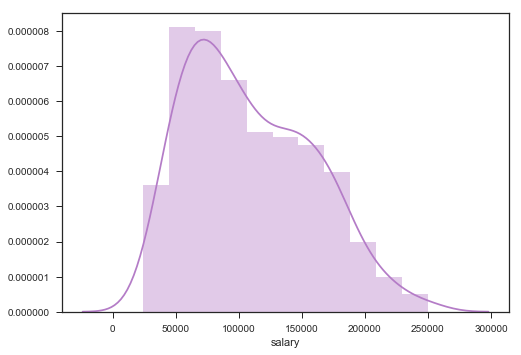

In [341]:
sns.set(style="ticks", palette="muted", color_codes=True)
sns.distplot(dfm.salary, color="m")
plt.show();

In [342]:
np.median(dfm.salary)
median = np.median(dfm.salary)

In [343]:
dfm

,location,title,company,salary,salrange,state
3,Houston,Quality Assurance Analyst (Research),Baylor College of Medicine,43794,20000,TX
4,Houston,Flow Cytometry Specialist I,Baylor College of Medicine,46831,20000,TX
59,Phoenix,RESEARCH AND STATISTICAL ANALYST,Arizona Health Care Cost Containment System,47741,20000,AZ
63,Scottsdale,Web Security Research Analyst,SiteLock,52500,20000,AZ
69,Phoenix,COMPLIANCE OFFICER - HAZ WASTE,State of Arizona,55750,20000,AZ
70,Phoenix,ENVIRONMENTAL SCIENTIST - EMISSIONS,State of Arizona,55000,20000,AZ
72,Tempe,Research Specialist,Arizona State University,36920,20000,AZ
73,Phoenix,RESEARCH & STATISTICS ANALYST,State of Arizona,37500,20000,AZ
75,Phoenix,ENVIRONMENTAL TECHNICIAN,State of Arizona,37500,20000,AZ
80,Phoenix,"Clinical/Research Nurse, OB/GYN (Phoenix, AZ)",The University of Arizona,70000,20000,AZ


In [344]:
dfm.reset_index(drop=True, inplace=True)

In [345]:
# dfm['hl'] = dfm['salary']

In [346]:
dfm['hl']

KeyError: 'hl'

In [ ]:
dfm["h1"] = dfm.apply(lambda x: "high" if row["salary"] > median else "low", axis=1)

In [ ]:
import collections as coll

In [ ]:
import pprint

In [466]:
commontitle = coll.Counter(" ".join(df.title).split()).most_common(200)

In [469]:
commontitle[-20:]

[('optical', 16),
 ('backend', 16),
 ('administrative', 16),
 ('(machine', 16),
 ('integration', 16),
 ('processing', 16),
 ('supervisor', 16),
 ('video', 16),
 ('front-end', 16),
 ('strategic', 16),
 ('drug', 16),
 ('accenture', 16),
 ('study', 15),
 ('affairs', 15),
 ('investment', 15),
 ('mobile', 15),
 ('database', 15),
 ('ux', 15),
 ('us', 15),
 ('electrical', 15)]

In [348]:
pp = pprint.PrettyPrinter()

In [349]:
print commontitle

[('Scientist', 1430), ('Data', 1403), ('-', 1101), ('Research', 864), ('Senior', 837), ('Engineer', 769), ('Analyst', 683), ('Manager', 393), ('Software', 372), ('Associate', 265), ('Learning', 257), ('Machine', 255), ('Sr.', 255), ('&', 254), ('Scientist,', 248), ('and', 234), ('Analytics', 217), ('Product', 209), ('Development', 202), ('Clinical', 196), ('Science', 186), ('/', 168), ('Manager,', 167), ('Quantitative', 164), ('Principal', 155), ('of', 154), ('Lead', 151), ('Specialist', 148), ('Director', 142), ('Developer', 133), ('II', 129), ('Statistical', 126), ('I', 116), ('Intern', 111), ('Director,', 111), ('Business', 101), ('Systems', 98), ('Job', 97), ('Marketing', 96), ('Project', 96), ('Operations', 93), ('Sr', 93), ('Engineering', 91), ('Staff', 88), ('Statistician', 84), ('Analyst,', 79), ('Medical', 79), ('Engineer,', 79), ('Technician', 75), ('Title', 72), ('Listed', 72), ('No', 72), ('Management', 70), ('Analysis', 68), ('Assistant', 68), ('Programmer', 67), ('Market'

In [350]:
dfm[dfm.title.str.contains("Sr")]

,location,title,company,salary,salrange,state
33,Philadelphia,Sr. Data Analyst-Statistician-PHARMA,Smith Hanley Associates,75000,20000,PA
54,Coral Gables,Sr. Research Analyst / Pre-award Grants,University of Miami,56000,20000,FL
55,Coral Gables,Sr. Research Laboratory Technician,University of Miami,46000,20000,FL
59,Coral Gables,Sr. Research Analyst,University of Miami,56000,20000,FL
90,Austin,Planner Sr (Statistician),Travis County,58916,20000,TX
102,Houston,Sr. Bioinformatics Programmer,Baylor College of Medicine,80500,60000,TX
106,Houston,"Sr Data Scientist (Hadoop) - Duluth, Georgia",No Company Listed,105000,60000,TX
248,New York,"Sr Process Scientist, Biologics Downstream Pur...",No Company Listed,124500,100000,NY
351,Los Angeles,"Sr. Data Scientist Needed for Top LA Start-Up,...",No Company Listed,160000,140000,CA
356,Seattle,Sr. Global Device Manager,No Company Listed,162500,140000,WA


In [351]:
commontitle[0][0]

'Scientist'

In [352]:
features = []
for x in commontitle:
    if x[0] not in ["-", "&", "/", "of"]:
        features.append(x[0])

In [353]:
features[0:20]

['Scientist',
 'Data',
 'Research',
 'Senior',
 'Engineer',
 'Analyst',
 'Manager',
 'Software',
 'Associate',
 'Learning',
 'Machine',
 'Sr.',
 'Scientist,',
 'and',
 'Analytics',
 'Product',
 'Development',
 'Clinical',
 'Science',
 'Manager,']

In [354]:
df.salary.values.tolist()

['No Salary Listed',
 'No Salary Listed',
 'No Salary Listed',
 '43794',
 '46831',
 'No Salary Listed',
 'No Salary Listed',
 'No Salary Listed',
 'No Salary Listed',
 'No Salary Listed',
 'No Salary Listed',
 'No Salary Listed',
 'No Salary Listed',
 'No Salary Listed',
 'No Salary Listed',
 'No Salary Listed',
 'No Salary Listed',
 'No Salary Listed',
 'No Salary Listed',
 'No Salary Listed',
 'No Salary Listed',
 'No Salary Listed',
 'No Salary Listed',
 'No Salary Listed',
 'No Salary Listed',
 'No Salary Listed',
 'No Salary Listed',
 'No Salary Listed',
 'No Salary Listed',
 'No Salary Listed',
 'No Salary Listed',
 'No Salary Listed',
 'No Salary Listed',
 'No Salary Listed',
 'No Salary Listed',
 'No Salary Listed',
 'No Salary Listed',
 'No Salary Listed',
 'No Salary Listed',
 'No Salary Listed',
 'No Salary Listed',
 'No Salary Listed',
 'No Salary Listed',
 'No Salary Listed',
 'No Salary Listed',
 'No Salary Listed',
 'No Salary Listed',
 'No Salary Listed',
 'No Salary Li

In [355]:
print features

['Scientist', 'Data', 'Research', 'Senior', 'Engineer', 'Analyst', 'Manager', 'Software', 'Associate', 'Learning', 'Machine', 'Sr.', 'Scientist,', 'and', 'Analytics', 'Product', 'Development', 'Clinical', 'Science', 'Manager,', 'Quantitative', 'Principal', 'Lead', 'Specialist', 'Director', 'Developer', 'II', 'Statistical', 'I', 'Intern', 'Director,', 'Business', 'Systems', 'Job', 'Marketing', 'Project', 'Operations', 'Sr', 'Engineering', 'Staff', 'Statistician', 'Analyst,', 'Medical', 'Engineer,', 'Technician', 'Title', 'Listed', 'No', 'Management', 'Analysis', 'Assistant', 'Programmer', 'Market', 'Architect', 'Big', 'Technical', 'III', 'Bioinformatics', 'Program', 'Process', 'Laboratory', 'Postdoctoral', 'Quality', 'Consultant', 'Sales', 'Computer', 'Lab', 'Digital', 'Health', 'Financial', 'Technology', 'Coordinator', 'Strategy', 'Security', 'Global', 'Environmental', 'RESEARCH', 'Designer', 'Risk', 'Fellow', 'Services', 'Platform', 'Computational', 'Test', 'Leader', 'Analytical', 'fo

In [356]:
We will separate our features into 

SyntaxError: invalid syntax (<ipython-input-356-da5ac4792573>, line 1)

In [357]:
HighFeatures = [
    "Senior",
    "Sr",
    "Specialist",
    "Manager",
    "Director",
    "Postdoctoral",
    "FinTech",
    "Financial",
    "Quantitative"
]

In [358]:
StandardFeatures = [
    
    
]

In [359]:
LowFeatures = [
    "Intern",
    "NGO",
    
]

In [360]:
for x in HighFeatures:
    df[x] = np.where(df['title'].str.contains(x), 1, 0)

In [361]:
dfm['hl'] = np.where(dfm['salary'] >= median, 1, 0)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [362]:
dfm.hl.value_counts()

1    206
0    184
Name: hl, dtype: int64

In [363]:
dfm.salary.shape

(390,)

In [364]:
dfm

,location,title,company,salary,salrange,state,hl
0,Houston,Quality Assurance Analyst (Research),Baylor College of Medicine,43794,20000,TX,0
1,Houston,Flow Cytometry Specialist I,Baylor College of Medicine,46831,20000,TX,0
2,Phoenix,RESEARCH AND STATISTICAL ANALYST,Arizona Health Care Cost Containment System,47741,20000,AZ,0
3,Scottsdale,Web Security Research Analyst,SiteLock,52500,20000,AZ,0
4,Phoenix,COMPLIANCE OFFICER - HAZ WASTE,State of Arizona,55750,20000,AZ,0
5,Phoenix,ENVIRONMENTAL SCIENTIST - EMISSIONS,State of Arizona,55000,20000,AZ,0
6,Tempe,Research Specialist,Arizona State University,36920,20000,AZ,0
7,Phoenix,RESEARCH & STATISTICS ANALYST,State of Arizona,37500,20000,AZ,0
8,Phoenix,ENVIRONMENTAL TECHNICIAN,State of Arizona,37500,20000,AZ,0
9,Phoenix,"Clinical/Research Nurse, OB/GYN (Phoenix, AZ)",The University of Arizona,70000,20000,AZ,0


In [365]:
dfm.drop('h1', axis=1, inplace=True)

ValueError: labels ['h1'] not contained in axis

In [366]:
df.salary.str.contains("hour").value_counts()

False    6286
Name: salary, dtype: int64

In [367]:
import patsy
import statsmodels.formula.api as smf

In [368]:
formula = 'hl ~  C(company) -1'
logreg = smf.logit(formula, data=dfm)
logreg_results = logreg.fit()
print logreg_results.summary()

         Current function value: 0.350378
         Iterations: 35


LinAlgError: Singular matrix

In [369]:
dfm[dfm['state'] == 'DE']

,location,title,company,salary,salrange,state,hl
262,Wilmington,Digital Marketing (Data Scientist),No Company Listed,115000,100000,DE,1


Maybe it is a good idea to check our distribution of data by state.

In [370]:
dfm['state'].value_counts()

NY    95
CA    80
TX    45
IL    45
WA    37
PA    20
GA    15
AZ    14
FL    13
NC    10
CO     9
OR     4
NJ     2
DE     1
Name: state, dtype: int64

In [371]:
df.loc[:,'state'].value_counts()

CA    1821
NY    1082
WA     595
TX     519
PA     500
IL     460
CO     319
GA     257
NC     218
NJ     192
FL     121
AZ      91
OR      77
DE      34
Name: state, dtype: int64

In [372]:
y = '/Users/sudheerpamula/data_science/student-lessons/projects/03-project/0.csv'
t = pd.read_csv(y)

In [373]:
t.drop("Unnamed: 0", axis=1, inplace=True)

In [374]:
loc = [t.location[i].split(",") for i in range(len(t.location))]

In [457]:
#Define a generic function using Pandas replace function
def coding(col, codeDict):
  colCoded = pd.Series(col, copy=True)
  for key, value in codeDict.items():
    colCoded.replace(key, value, inplace=True)
  return colCoded

df.salrange = coding(df.salrange, {20000:40000, 60000:80000, 100000:120000, 140000:160000, 180000:20000})

In [458]:
df.loc[df['salary'] == 'No Salary Listed', 'salary'] = df.loc[df['salary'] == 'No Salary Listed', 'salrange']

In [380]:
df

,location,title,company,salary,salrange,state,Senior,Sr,Specialist,Manager,Director,Postdoctoral,FinTech,Financial,Quantitative
0,Sugar Land,Ultimate Hoops Statistician,Life Time Fitness,40000,40000,TX,0,0,0,0,0,0,0,0,0
1,Houston,Research Scientist,Houston Methodist,40000,40000,TX,0,0,0,0,0,0,0,0,0
2,Houston,Research Scientist,Preferred Sands,40000,40000,TX,0,0,0,0,0,0,0,0,0
3,Houston,Quality Assurance Analyst (Research),Baylor College of Medicine,43794,40000,TX,0,0,0,0,0,0,0,0,0
4,Houston,Flow Cytometry Specialist I,Baylor College of Medicine,46831,40000,TX,0,0,1,0,0,0,0,0,0
5,Houston,Scientist,Houston Methodist,40000,40000,TX,0,0,0,0,0,0,0,0,0
6,Houston,MSAT Scientist,Lonza,40000,40000,TX,0,0,0,0,0,0,0,0,0
7,Houston,Development Research Analyst,Rice University,40000,40000,TX,0,0,0,0,0,0,0,0,0
8,Houston,Systems Engineer - Linux,Cray,40000,40000,TX,0,0,0,0,0,0,0,0,0
9,Houston,Sr Research Technician in Biorepository Core,Texas Heart Institute,40000,40000,TX,0,1,0,0,0,0,0,0,0


In [331]:
df.loc[(df['salary'] == "No Salary Listed") & (df['salrange'] != 220000), ['salary', 'salrange']] = 

,salary,salrange
0,No Salary Listed,20000
1,No Salary Listed,20000
2,No Salary Listed,20000
5,No Salary Listed,20000
6,No Salary Listed,20000
7,No Salary Listed,20000
8,No Salary Listed,20000
9,No Salary Listed,20000
10,No Salary Listed,20000
11,No Salary Listed,20000


In [296]:
df.loc[(df['salary'] == "No Salary Listed") & (df['salrange'] != 220000), 'salary']

0       No Salary Listed
1       No Salary Listed
2       No Salary Listed
5       No Salary Listed
6       No Salary Listed
7       No Salary Listed
8       No Salary Listed
9       No Salary Listed
10      No Salary Listed
11      No Salary Listed
12      No Salary Listed
13      No Salary Listed
14      No Salary Listed
15      No Salary Listed
16      No Salary Listed
17      No Salary Listed
18      No Salary Listed
19      No Salary Listed
20      No Salary Listed
21      No Salary Listed
22      No Salary Listed
23      No Salary Listed
24      No Salary Listed
25      No Salary Listed
26      No Salary Listed
27      No Salary Listed
28      No Salary Listed
29      No Salary Listed
30      No Salary Listed
31      No Salary Listed
              ...       
6291    No Salary Listed
6292    No Salary Listed
6293    No Salary Listed
6294    No Salary Listed
6295    No Salary Listed
6296    No Salary Listed
6297    No Salary Listed
6298    No Salary Listed
6299    No Salary Listed


In [381]:
df

,location,title,company,salary,salrange,state,Senior,Sr,Specialist,Manager,Director,Postdoctoral,FinTech,Financial,Quantitative
0,Sugar Land,Ultimate Hoops Statistician,Life Time Fitness,40000,40000,TX,0,0,0,0,0,0,0,0,0
1,Houston,Research Scientist,Houston Methodist,40000,40000,TX,0,0,0,0,0,0,0,0,0
2,Houston,Research Scientist,Preferred Sands,40000,40000,TX,0,0,0,0,0,0,0,0,0
3,Houston,Quality Assurance Analyst (Research),Baylor College of Medicine,43794,40000,TX,0,0,0,0,0,0,0,0,0
4,Houston,Flow Cytometry Specialist I,Baylor College of Medicine,46831,40000,TX,0,0,1,0,0,0,0,0,0
5,Houston,Scientist,Houston Methodist,40000,40000,TX,0,0,0,0,0,0,0,0,0
6,Houston,MSAT Scientist,Lonza,40000,40000,TX,0,0,0,0,0,0,0,0,0
7,Houston,Development Research Analyst,Rice University,40000,40000,TX,0,0,0,0,0,0,0,0,0
8,Houston,Systems Engineer - Linux,Cray,40000,40000,TX,0,0,0,0,0,0,0,0,0
9,Houston,Sr Research Technician in Biorepository Core,Texas Heart Institute,40000,40000,TX,0,1,0,0,0,0,0,0,0


In [402]:
df.title = df.title.str.lower()

In [447]:
dropkeywords = ["chemist", "technician", "cardiology", "cytometry", "cytometry", "air monitoring", 
                "photonic", "technologist", "magnetoencepholography", "attorney", "operator",
               "hemostatic", "payload design", "instructional designer", "landscape architect",
               "ui designer", "contract technical recruiter", "sales manager", "office manager",
               "product designer", "recruitment coordinator"]

In [448]:
df[~df['title'].str.contains('|'.join(dropkeywords))]

,location,title,company,salary,salrange,state,city
2,"Houston, TX",research scientist,Preferred Sands,No Salary Listed,20000,TX,Houston
3,"Houston, TX",quality assurance analyst (research),Baylor College of Medicine,43794,20000,TX,Houston
5,"Houston, TX 77030 (Medical area)",scientist,Houston Methodist,No Salary Listed,20000,TX,Houston
6,"Houston, TX",msat scientist,Lonza,No Salary Listed,20000,TX,Houston
7,"Houston, TX",development research analyst,Rice University,No Salary Listed,20000,TX,Houston
8,"Houston, TX",systems engineer - linux,Cray,No Salary Listed,20000,TX,Houston
10,"Houston, TX","analyst, market fundamentals (research)",No Company Listed,No Salary Listed,20000,TX,Houston
11,"Houston, TX",research analyst,Pennwell Corporation,No Salary Listed,20000,TX,Houston
12,"Houston, TX",feasibility research analyst ii - novella clin...,Novella Clinical,No Salary Listed,20000,TX,Houston
13,"Houston, TX",research scientist - clinical cancer preventio...,MD Anderson Cancer Center,No Salary Listed,20000,TX,Houston


In [446]:
df.salary =

4677      project manager - center for molecular oncology
5931                                      devops engineer
5840                                       data scientist
3779                                  no job title listed
534               research study assistant i (pediatrics)
852     administrative intern-information technology p...
956                       farsi speaking research analyst
2326                                     research analyst
1540                                   sr. data scientist
1454                               postdoctoral associate
1477                                       data scientist
2185                                     research analyst
1561               data science intern (master's program)
457                                transportation analyst
4148                                 data science manager
3859                   senior back-end software developer
3708    medical technologist/clinical laboratory scien...
980           

In [470]:
commontitle = coll.Counter(" ".join(df.title).split()).most_common(200)
type(df.title)

pandas.core.series.Series

In [ ]:
test = df.

In [474]:
commontitle = coll.Counter(" ".join(df[df.salary < 80000]['title'].str.split()).most_common(50))

TypeError: sequence item 0: expected string, list found

In [461]:
df.loc[df.salary < 80000, 'title']

2                                      research scientist
5                                               scientist
6                                          msat scientist
7                            development research analyst
8                                systems engineer - linux
9            sr research technician in biorepository core
10                analyst, market fundamentals (research)
11                                       research analyst
12      feasibility research analyst ii - novella clin...
13      research scientist - clinical cancer preventio...
14                   r&d chemist, associate - r&d chemist
15                               metallurgical technician
16                                     research associate
17                                    no job title listed
18            property accounting / management specialist
19                                          epa scientist
20           research associate i in molecular cardiology
21            